# Deep Neural Networks Laboration

Data used in this laboration are from the Kitsune Network Attack Dataset, https://archive.ics.uci.edu/ml/datasets/Kitsune+Network+Attack+Dataset . We will focus on the 'Mirai' part of the dataset. Your task is to make a DNN that can classify if each attack is benign or malicious. The dataset has 116 covariates, but to make it a bit more difficult we will remove the first 24 covariates.

You need to answer all questions in this notebook.

# Part 1: Get the data

Skip this part if you load stored numpy arrays (Mirai*.npy) (which is recommended)

Use `wget` in the terminal of your cloud machine (in the same directory as where you have saved this notebook) to download the data, i.e.

wget https://archive.ics.uci.edu/ml/machine-learning-databases/00516/mirai/Mirai_dataset.csv.gz

wget https://archive.ics.uci.edu/ml/machine-learning-databases/00516/mirai/Mirai_labels.csv.gz

Then unpack the files using `gunzip` in the terminal, i.e.

gunzip Mirai_dataset.csv.gz

gunzip Mirai_labels.csv.gz

# Part 2: Get a graphics card

Skip this part if you run on the CPU (recommended)

Lets make sure that our script can see the graphics card that will be used. The graphics cards will perform all the time consuming calculations in every training iteration.

In [11]:
#import os
#import warnings

# Ignore FutureWarning from numpy
#warnings.simplefilter(action='ignore', category=FutureWarning)

#import keras.backend as K
#import tensorflow as tf

#os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
#os.environ["CUDA_VISIBLE_DEVICES"]="0";

# Allow growth of GPU memory, otherwise it will always look like all the memory is being used
#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True) 

ModuleNotFoundError: No module named 'keras'

In [ ]:
# Part 3: Hardware

In deep learning, the computer hardware is very important. You should always know what kind of hardware you are working on. Lets pretend that everyone is using an Nvidia RTX 3090 graphics card.

Question 1: Google the name of the graphics card, how many CUDA cores does it have?
    # Nvidia RTX 3090 GPU Card has 10496 CUDA Cores

Question 2: How much memory does the graphics card have?
    # Nvidia RTX 3090 GPU Card has 24GB memory

Question 3: What is stored in the GPU memory while training a DNN ?
    # i Data stored in batches
    # ii. Filter outputs for each layer
    # iii. Weights of network 
    # iv. Gradients of all parameters

# Part 4: Load the data

To make this step easier, directly load the data from saved numpy arrays (.npy) (recommended)


Load the dataset from the csv files, it will take some time since it is almost 1.4 GB. (not recommended, unless you want to learn how to do it)

We will use the function `genfromtxt` to load the data. (not recommended, unless you want to learn how to do it)

https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html

Load the data from csv files the first time, then save the data as numpy files for faster loading the next time.


In [3]:
from numpy import genfromtxt # Not needed if you load data from numpy arrays
import numpy as np

# Load data from numpy arrays, choose reduced files if the training takes too long
X = np.load('Mirai_data.npy')
Y = np.load('Mirai_labels.npy')

# Remove the first 24 covariates (columns)
X = np.delete(X,slice(0,24),axis=1)

# Print the number of examples of each class
print('The number of examples in class X {}.'.format(X.shape))
print('The number of examples in class Y {}.'.format(Y.shape))
    

The number of examples in class X (764137, 92).
The number of examples in class Y (764137,).


# Part 5: How good is a naive classifier?

Question 4: Given the number of examples from each class, how high classification performance can a naive classifier obtain? The naive classifier will assume that all examples belong to one class. Note: you do not need to make a naive classifier, this is a theoretical question, just to understand how good performance we can obtain by guessing that all examples belong to one class.

In [64]:
# A Naive classifier is widel used because it's fast, precise and can classify up to 95% accuracy

In [4]:
# It is common to have NaNs in the data, lets check for it. Hint: np.isnan()

# Print the number of NaNs (not a number) in the labels
print("the number of NaNs in the labels : ",np.sum(np.isnan(Y)))

# Print the number of NaNs in the covariates
print("the number of NaNs in the covariates : ",np.sum(np.isnan(X)))

the number of NaNs in the labels :  0
the number of NaNs in the covariates :  0


# Part 6: Preprocessing

Lets do some simple preprocessing

In [8]:
# Convert covariates to floats
X.astype(float)

# Convert labels to integers
Y.astype(int)

# Remove mean of each covariate (column)
mu_X = X - np.mean(X,axis=0)

# Divide each covariate (column) by its standard deviation
X = X/np.std(X,axis=0)

# Check that mean is 0 and standard deviation is 1 for all covariates, by printing mean and std
print("mean of all X :\n ",np.mean(X,axis=0))
print("Standard deviation of all X :\n ", np.std(X,axis=0))  

mean of all X :
  [ 8.84842519e-02  1.71325955e+00  4.84714942e+00  1.73240693e-01
  1.63718412e+00  4.95028469e+00  2.16093605e-01  2.63493748e+00
  3.42618075e+00  1.81132159e-01  2.76335736e+00  2.19991906e-02
  2.32010868e-02  4.72374129e-02  2.60262722e+00  3.43857741e+00
  2.09734584e-01  2.77450258e+00  2.72671940e-02  3.22351108e-02
  7.36250544e-02  2.99179193e+00  3.46776963e+00  2.56811085e-01
  2.80190984e+00  4.07783408e-02  6.46380722e-02  1.25430254e-01
  3.57177015e+00  3.48676917e+00  3.39951911e-01  2.81184663e+00
  5.72305998e-02  1.61069367e-01  1.96777880e-01  3.03325894e+00
  3.47032092e+00  3.43749693e-01  2.79536505e+00  5.02286258e-02
  2.22689854e-01  2.36792137e-01  2.63493748e+00  2.41813111e-02
  1.57962912e-02  2.60262722e+00  2.57839855e-02  2.30898139e-02
  2.99179193e+00  3.22489912e-02  3.59076403e-02  3.57177015e+00
  5.32304659e-02  7.53219640e-02  3.03325894e+00  8.09076995e-02
  1.32545399e-01  1.31299361e+00  3.39924713e+00  7.53369415e-02
  3.016

MemoryError: Unable to allocate 536. MiB for an array with shape (764137, 92) and data type float64

# Part 7: Split the dataset

Use the first 70% of the dataset for training, leave the other 30% for validation and test, call the variables

Xtrain (70%)

Xtemp  (30%)

Ytrain (70%)

Ytemp  (30%)

We use a function from scikit learn.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [9]:
from sklearn.model_selection import train_test_split

# Your code
Xtrain, Xtemp, Ytrain, Ytemp = train_test_split(X, Y,train_size=0.7, test_size=0.3)

# Print the number of examples of each class, for the training data and the remaining 30%
print('Xtrain has size {}.'.format(Xtrain.shape))
print('Ytrain has size {}.'.format(Ytrain.shape))

print('Xtemp has size {}.'.format(Xtemp.shape))
print('Ytemp has size {}.'.format(Ytemp.shape))


Xtrain has size (534895, 92).
Ytrain has size (534895,).
Xtemp has size (229242, 92).
Ytemp has size (229242,).


#  Part 8: Split non-training data data into validation and test
Now split your non-training data (Xtemp, Ytemp) into 50% validation (Xval, Yval) and 50% testing (Xtest, Ytest), we use a function from scikit learn. In total this gives us 70% for training, 15% for validation, 15% for test.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Do all variables (Xtrain,Ytrain), (Xval,Yval), (Xtest,Ytest) have the shape that you expect?

In [10]:
from sklearn.model_selection import train_test_split
Xval,Xtest, Yval, Ytest = train_test_split(Xtemp, Ytemp, test_size=0.5,train_size=0.5)
print('Validation and test samples are {}, {}, {} and {}'.format(Xval.shape, Xtest.shape, Yval.shape, Ytest.shape))
Xval
Yval

MemoryError: Unable to allocate 80.5 MiB for an array with shape (114621, 92) and data type float64

# Part 9: DNN classification

Finish this code to create a first version of the classifier using a DNN. Start with a simple network with 2 dense layers (with 20 nodes each), using sigmoid activation functions. The final dense layer should have a single node and a sigmoid activation function. We start with the SGD optimizer.

For different parts of this notebook you need to go back here, add more things, and re-run this cell to re-define the build function.

Relevant functions are

`model.add()`, adds a layer to the network

`Dense()`, a dense network layer

`model.compile()`, compile the model, add " metrics=['accuracy'] " to print the classification accuracy during the training

See https://keras.io/layers/core/ for information on how the `Dense()` function works

Import a relevant cost / loss function for binary classification from keras.losses (https://keras.io/losses/)

See the following links for how to compile, train and evaluate the model

https://keras.io/api/models/model_training_apis/#compile-method

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method


In [69]:

from keras.models import Sequential, Model
from keras.layers import Input, Dense, Activation
from tensorflow.keras.optimizers import SGD
from keras.losses import binary_crossentropy as BC


# Set seed from random number generator, for better comparisons
from numpy.random import seed
seed(123)

def build_DNN(input_shape, number_layers, number_nodes, act_fun='sigmoid', optimizer='sgd', learning_rate=0.1, 
              use_bn=False, use_dropout=False, use_custom_dropout=False):
    
    # Setup optimizer, depending on input parameter string
    if optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate)
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    # Setup a sequential model
    model = Sequential()
    # Add layers to the model, using the input parameters of the build_DNN function   
    # Add first layer, requires input shape
    model.add(Dense(number_nodes,activation=act_fun,input_dim=input_shape[1]))
    if use_bn == True:
        model.add(BatchNormalization())
    if use_dropout == True:
        model.add(Dropout(0.5))
    if use_custom_dropout == True:
        model.add(myDropout(rate=learning_rate,training = True))
    
    # Add remaining layers, do not require input shape
    for i in range(number_layers-1):
        model.add(Dense(number_nodes,activation=act_fun))
    if use_bn==True:
        model.add(BatchNormalization())
    if use_dropout==True:
        model.add(Dropout(0.5))
    if use_custom_dropout==True:
        model.add(myDropout(rate=learning_rate,training=True))
    
    # Add final layer
    model.add(Dense(1,activation='sigmoid'))
       
    # Compile model
    model.compile(loss=BC,optimizer=opt,metrics=['accuracy'])
    return model

In [70]:
# Lets define a help function for plotting the training results

import matplotlib.pyplot as plt
def plot_results(history):
    
    val_loss = history.history['val_loss']
    acc = history.history['accuracy']
    loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training','Validation'])

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training','Validation'])

    plt.show()

# Part 10: Train the DNN

Time to train the DNN, we start simple with 2 layers with 20 nodes each, learning rate 0.1.

Relevant functions

`build_DNN`, the function we defined in Part 9, call it with the parameters you want to use

`model.fit()`, train the model with some training data

`model.evaluate()`, apply the trained model to some test data

See the following links for how to train and evaluate the model

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method


### 2 layers, 20 nodes

In [71]:
# Setup some training parameters
batch_size = 10000
epochs = 20

input_shape = Xtrain.shape

# Build the model
model1 = build_DNN(input_shape=input_shape,
                   number_layers=2,
                   number_nodes=20,
                   learning_rate=0.1)

# Train the model, provide training data and validation data
history1 = model1.fit(Xtrain,
                      Ytrain,
                      batch_size=10000,
                      epochs=20,
                      verbose=1,
                      validation_data=(Xval,Yval))
model1.summary()

Epoch 1/20
54/54 [==============================] - 2s 34ms/step - loss: 0.4392 - accuracy: 0.8406 - val_loss: 0.4239 - val_accuracy: 0.8401
Epoch 2/20
54/54 [==============================] - 2s 43ms/step - loss: 0.4122 - accuracy: 0.8406 - val_loss: 0.3991 - val_accuracy: 0.8401
Epoch 3/20
54/54 [==============================] - 2s 41ms/step - loss: 0.3801 - accuracy: 0.8406 - val_loss: 0.3575 - val_accuracy: 0.8401
Epoch 4/20
54/54 [==============================] - 2s 41ms/step - loss: 0.3321 - accuracy: 0.8406 - val_loss: 0.3068 - val_accuracy: 0.8401
Epoch 5/20
54/54 [==============================] - 2s 41ms/step - loss: 0.2849 - accuracy: 0.8406 - val_loss: 0.2631 - val_accuracy: 0.8401
Epoch 6/20
54/54 [==============================] - 2s 41ms/step - loss: 0.2470 - accuracy: 0.8422 - val_loss: 0.2311 - val_accuracy: 0.8498
Epoch 7/20
54/54 [==============================] - 3s 48ms/step - loss: 0.2213 - accuracy: 0.8658 - val_loss: 0.2109 - val_accuracy: 0.8819
Epoch 8/20
54

In [72]:
# Evaluate the model on the test data
score = model1.evaluate(Xtest,Ytest,batch_size=10000)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

12/12 [==============================] - 0s 2ms/step - loss: 0.1685 - accuracy: 0.9087
Test loss: 0.1685
Test accuracy: 0.9087


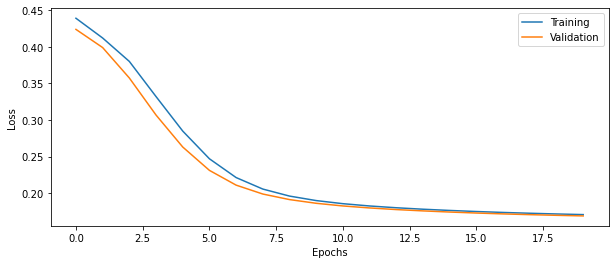

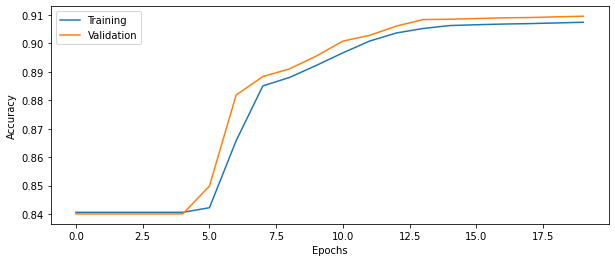

In [73]:
# Plot the history from the training run
plot_results(history1)

In [ ]:
# Part 11: More questions

Question 5: What happens if you add several Dense layers without specifying the activation function?
         #  Without specifying activation function, the neural network will perform linear mappings of input to output
         #  Activation functions helps to include some non-linear property

Question 6: How are the weights in each dense layer initialized as default? How are the bias weights initialized?
         #  Weight are initialized by uniform distribution and bias weights are initialized as zeros : 0


In [ ]:
#

# Part 12: Balancing the classes

This dataset is rather unbalanced, we need to define class weights so that the training pays more attention to the class with fewer samples. We use a function in scikit learn

https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html

You need to call the function something like this

class_weights = class_weight.compute_class_weight(class_weight = , classes = , y = )

otherwise it will complain

In [74]:
from sklearn.utils import class_weight

# Calculate class weights
class_weights=class_weight.compute_class_weight('balanced', classes=np.unique(Ytrain), y=Ytrain)

# Print the class weights
#print(class_weights)

# Keras wants the weights in this form, uncomment and change value1 and value2 to your weights, 
# or get them from the array that is returned from class_weight

class_weights = {0:class_weights[0], 1:class_weights[1]}
class_weights

{0: 3.13725087684313, 1: 0.5947956837156341}

### 2 layers, 20 nodes, class weights

In [80]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape

# Build and train model
model2 = build_DNN(input_shape=input_shape,
                   number_layers=2,
                   number_nodes=20,
                   learning_rate=0.1)

history2 = model2.fit(Xtrain, 
                      Ytrain, 
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1, 
                      validation_data=(Xval,Yval),
                      class_weight=class_weights)
model2.summary()

Epoch 1/20
54/54 [==============================] - 2s 34ms/step - loss: 0.6757 - accuracy: 0.6226 - val_loss: 0.6288 - val_accuracy: 0.8882
Epoch 2/20
54/54 [==============================] - 1s 27ms/step - loss: 0.5761 - accuracy: 0.8871 - val_loss: 0.5093 - val_accuracy: 0.8881
Epoch 3/20
54/54 [==============================] - 4s 70ms/step - loss: 0.4340 - accuracy: 0.8853 - val_loss: 0.3746 - val_accuracy: 0.8875
Epoch 4/20
54/54 [==============================] - 2s 38ms/step - loss: 0.3132 - accuracy: 0.8856 - val_loss: 0.3028 - val_accuracy: 0.8882
Epoch 5/20
54/54 [==============================] - 2s 35ms/step - loss: 0.2547 - accuracy: 0.8867 - val_loss: 0.2719 - val_accuracy: 0.8898
Epoch 6/20
54/54 [==============================] - 2s 34ms/step - loss: 0.2293 - accuracy: 0.8886 - val_loss: 0.2605 - val_accuracy: 0.8917
Epoch 7/20
54/54 [==============================] - 2s 32ms/step - loss: 0.2164 - accuracy: 0.8908 - val_loss: 0.2521 - val_accuracy: 0.8940
Epoch 8/20
54

In [81]:
# Evaluate model on test data
score = model2.evaluate(Xtest,Ytest,batch_size=10000,verbose=1)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

12/12 [==============================] - 0s 2ms/step - loss: 0.2255 - accuracy: 0.9084
Test loss: 0.2255
Test accuracy: 0.9084


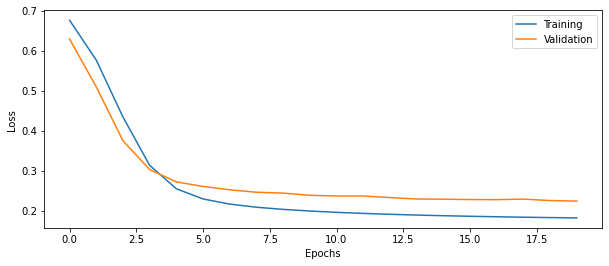

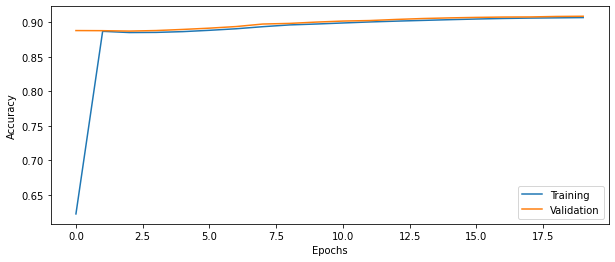

In [82]:
plot_results(history2)

In [ ]:
# Part 13: More questions

Skip questions 8 and 9 if you run on the CPU (recommended)

Question 7: Why do we have to use a batch size? Why can't we simply use all data at once? This is more relevant for even larger datasets.
            # We load the data in batches due to memory limitations of the CPU, not all data can be feed in at once

Question 8: How busy is the GPU for a batch size of 100? How much GPU memory is used? Hint: run 'nvidia-smi' on the computer a few times during training.

Question 9: What is the processing time for one training epoch when the batch size is 100? What is the processing time for one epoch when the batch size is 1,000? What is the processing time for one epoch when the batch size is 10,000? Explain the results. 
            # Training examples is divided by the batch size, it gives no of iterations for one training epoch, hence larger batch size takes less time which is good for the cpu
            # As seen in model summary above processing times for one epoch, 
            # Processing times for 100 batch size is 11s : model2
            # Processing times for 1000 batch size is 3s : model1
            # Processing times for 10000 batch size is 2s : model3
Question 10: How many times are the weights in the DNN updated in each training epoch if the batch size is 100? How many times are the weights in the DNN updated in each training epoch if the batch size is 1,000? How many times are the weights in the DNN updated in each training epoch if the batch size is 10,000?  
             # The number of times the weights are updated in each epoch is number of training samples divided by the batch size
             # for 100 batch size = 534895/100 = 5348 times
             # for 1000 batch size = 534895/1000 = 534 times
             # for 1000 batch size = 534895/10000 = 53 times
Question 11: What limits how large the batch size can be?
             # The memory capacity of the CPU
        
Question 12: Generally speaking, how is the learning rate related to the batch size? If the batch size is decreased, how should the learning rate be changed?
             # When we want to train the neural network we increase the learning rate, which converges to a local minima at a faster rate.
             # Also we can increase the learning rate by increasing the batch size, this however can lead to overfitting,therefore optimal 
             # accuracy is achieved by reducing the batch size and increasing the learning rate, assuming no optimizimation(adam,sgd) is used

Lets use a batch size of 10,000 from now on, and a learning rate of 0.1.

In [ ]:
# Part 14: Increasing the complexity

Lets try some different configurations of number of layers and number of nodes per layer.

Question 13: How many trainable parameters does the network with 4 dense layers with 50 nodes each have, compared to the initial network with 2 layers and 20 nodes per layer? Hint: use model.summary()
         #    According to results from model.summary(1), there are 2301 parameters for 2 layers and 20 nodes per layer, while there are 12,351 trainable parameters for 4 layers and 50 nodes network
         #    as seen in model.summary(3)   

### 4 layers, 20 nodes, class weights

In [83]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape

# Build and train model
model3 = build_DNN(input_shape=input_shape,
                   number_layers=4,
                   number_nodes=20,
                   learning_rate=0.1)


history3 = model3.fit(Xtrain,
                      Ytrain,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(Xval,Yval),
                      class_weight=class_weights) 
model3.summary()

Epoch 1/20
54/54 [==============================] - 7s 119ms/step - loss: 0.6983 - accuracy: 0.2779 - val_loss: 0.6870 - val_accuracy: 0.8401
Epoch 2/20
54/54 [==============================] - 7s 135ms/step - loss: 0.6932 - accuracy: 0.5277 - val_loss: 0.6944 - val_accuracy: 0.1574
Epoch 3/20
54/54 [==============================] - 6s 120ms/step - loss: 0.6929 - accuracy: 0.3973 - val_loss: 0.6894 - val_accuracy: 0.8393
Epoch 4/20
54/54 [==============================] - 4s 79ms/step - loss: 0.6927 - accuracy: 0.5981 - val_loss: 0.6920 - val_accuracy: 0.8601
Epoch 5/20
54/54 [==============================] - 4s 67ms/step - loss: 0.6925 - accuracy: 0.5569 - val_loss: 0.6929 - val_accuracy: 0.7796
Epoch 6/20
54/54 [==============================] - 3s 59ms/step - loss: 0.6922 - accuracy: 0.5679 - val_loss: 0.6913 - val_accuracy: 0.8671
Epoch 7/20
54/54 [==============================] - 4s 66ms/step - loss: 0.6918 - accuracy: 0.5950 - val_loss: 0.6856 - val_accuracy: 0.8400
Epoch 8/20

In [84]:
# Evaluate model on test data
score = model3.evaluate(Xtest,Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 4s 1ms/step - loss: 0.6450 - accuracy: 0.8774
Test loss: 0.6450
Test accuracy: 0.8774


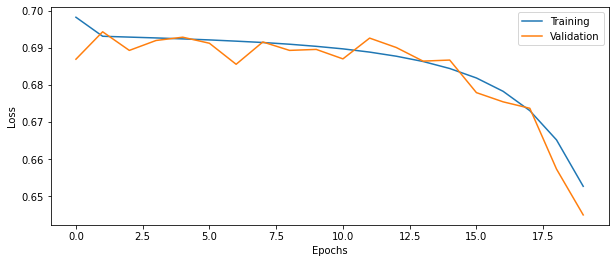

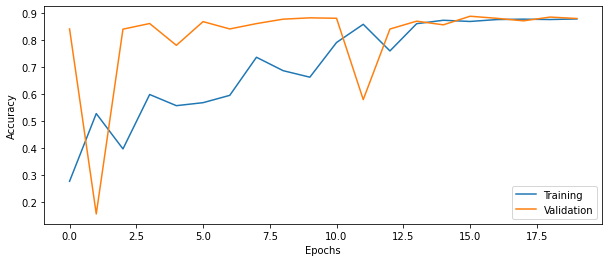

In [85]:
plot_results(history3)

### 2 layers, 50 nodes, class weights

In [86]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape

# Build and train model
model4 = build_DNN(input_shape=input_shape,
                   number_layers=2,
                   number_nodes=50,
                   learning_rate=0.1)

history4 = model4.fit(Xtrain,
                      Ytrain,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(Xval,Yval),
                      class_weight=class_weights) 
model4.summary()

Epoch 1/20
54/54 [==============================] - 1s 14ms/step - loss: 0.6605 - accuracy: 0.7881 - val_loss: 0.6003 - val_accuracy: 0.8880
Epoch 2/20
54/54 [==============================] - 1s 10ms/step - loss: 0.5207 - accuracy: 0.8837 - val_loss: 0.4167 - val_accuracy: 0.8853
Epoch 3/20
54/54 [==============================] - 1s 14ms/step - loss: 0.3384 - accuracy: 0.8825 - val_loss: 0.3029 - val_accuracy: 0.8848
Epoch 4/20
54/54 [==============================] - 1s 15ms/step - loss: 0.2523 - accuracy: 0.8846 - val_loss: 0.2649 - val_accuracy: 0.8892
Epoch 5/20
54/54 [==============================] - 1s 12ms/step - loss: 0.2246 - accuracy: 0.8880 - val_loss: 0.2568 - val_accuracy: 0.8911
Epoch 6/20
54/54 [==============================] - 1s 12ms/step - loss: 0.2129 - accuracy: 0.8903 - val_loss: 0.2510 - val_accuracy: 0.8931
Epoch 7/20
54/54 [==============================] - 1s 12ms/step - loss: 0.2062 - accuracy: 0.8930 - val_loss: 0.2432 - val_accuracy: 0.8973
Epoch 8/20
54

In [87]:
# Evaluate model on test data
score = model4.evaluate(Xtest,Ytest,batch_size=10000)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

12/12 [==============================] - 0s 4ms/step - loss: 0.2244 - accuracy: 0.9076
Test loss: 0.2244
Test accuracy: 0.9076


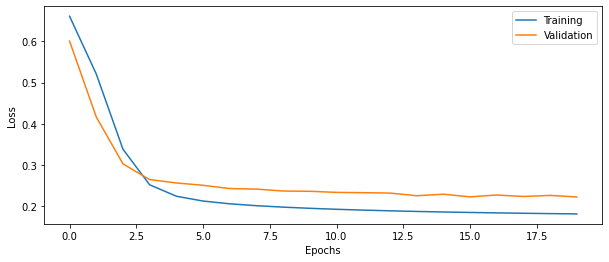

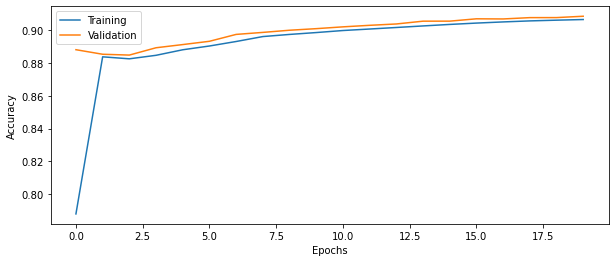

In [88]:
plot_results(history4)

### 4 layers, 50 nodes, class weights

In [89]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape

# Build and train model
model5 = build_DNN(input_shape=input_shape,
                   number_layers=4,
                   number_nodes=50,
                   learning_rate=0.1)
    

history5 = model5.fit(Xtrain,
                      Ytrain,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(Xval,Yval),
                      class_weight=class_weights)  
model5.summary()

Epoch 1/20
54/54 [==============================] - 2s 24ms/step - loss: 0.6932 - accuracy: 0.5089 - val_loss: 0.7001 - val_accuracy: 0.1599
Epoch 2/20
54/54 [==============================] - 1s 15ms/step - loss: 0.6925 - accuracy: 0.4810 - val_loss: 0.6842 - val_accuracy: 0.8401
Epoch 3/20
54/54 [==============================] - 3s 55ms/step - loss: 0.6921 - accuracy: 0.6085 - val_loss: 0.6979 - val_accuracy: 0.1599
Epoch 4/20
54/54 [==============================] - 3s 46ms/step - loss: 0.6916 - accuracy: 0.5745 - val_loss: 0.6955 - val_accuracy: 0.1599
Epoch 5/20
54/54 [==============================] - 2s 36ms/step - loss: 0.6911 - accuracy: 0.5824 - val_loss: 0.6949 - val_accuracy: 0.1599
Epoch 6/20
54/54 [==============================] - ETA: 0s - loss: 0.6903 - accuracy: 0.65 - 2s 31ms/step - loss: 0.6904 - accuracy: 0.6598 - val_loss: 0.7017 - val_accuracy: 0.1599
Epoch 7/20
54/54 [==============================] - 2s 31ms/step - loss: 0.6897 - accuracy: 0.6862 - val_loss: 0

In [90]:
# Evaluate model on test data
score = model5.evaluate(Xtest,Ytest,batch_size=10000)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

12/12 [==============================] - 0s 6ms/step - loss: 0.2787 - accuracy: 0.8876
Test loss: 0.2787
Test accuracy: 0.8876


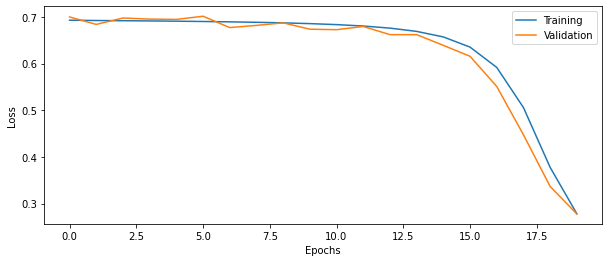

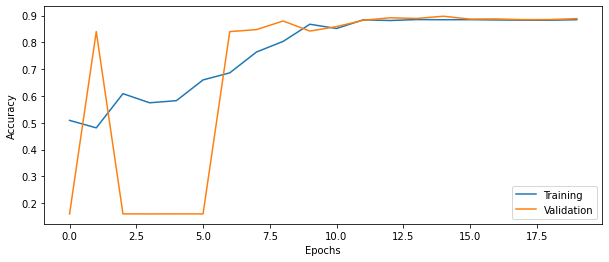

In [91]:
plot_results(history5)

# Part 15: Batch normalization

Now add batch normalization after each dense layer in `build_DNN`. Remember to import BatchNormalization from keras.layers. 

See https://keras.io/layers/normalization/ for information about how to call the function.

Question 14: Why is batch normalization important when training deep networks?

In [ ]:
# Batch normalization standardize or normalize the inputs to every layer, it helps to reduce the number of epochs
# thus improving the learning rate and accuracy

### 2 layers, 20 nodes, class weights, batch normalization

In [92]:
from tensorflow.keras.layers import BatchNormalization
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape

# Build and train model
model6 = build_DNN(input_shape=input_shape,
                   number_layers=2,
                   number_nodes=20,
                   learning_rate=0.1,
                   use_bn=True)
 

history6 = model6.fit(Xtrain,
                      Ytrain,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(Xval,Yval),
                      class_weight=class_weights) 
model6.summary()

Epoch 1/20
54/54 [==============================] - 3s 39ms/step - loss: 0.2847 - accuracy: 0.8922 - val_loss: 0.4185 - val_accuracy: 0.8401
Epoch 2/20
54/54 [==============================] - 2s 30ms/step - loss: 0.2097 - accuracy: 0.9053 - val_loss: 0.3978 - val_accuracy: 0.8401
Epoch 3/20
54/54 [==============================] - 2s 29ms/step - loss: 0.1927 - accuracy: 0.9081 - val_loss: 0.3780 - val_accuracy: 0.8400
Epoch 4/20
54/54 [==============================] - 4s 71ms/step - loss: 0.1846 - accuracy: 0.9098 - val_loss: 0.3522 - val_accuracy: 0.8400
Epoch 5/20
54/54 [==============================] - 2s 40ms/step - loss: 0.1798 - accuracy: 0.9110 - val_loss: 0.2972 - val_accuracy: 0.8402
Epoch 6/20
54/54 [==============================] - 2s 37ms/step - loss: 0.1764 - accuracy: 0.9123 - val_loss: 0.2468 - val_accuracy: 0.8470
Epoch 7/20
54/54 [==============================] - 2s 41ms/step - loss: 0.1738 - accuracy: 0.9134 - val_loss: 0.1990 - val_accuracy: 0.8661
Epoch 8/20
54

In [93]:
# Evaluate model on test data
score = model6.evaluate(Xtest,Ytest,batch_size=10000)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

12/12 [==============================] - 0s 5ms/step - loss: 0.1927 - accuracy: 0.9183
Test loss: 0.1927
Test accuracy: 0.9183


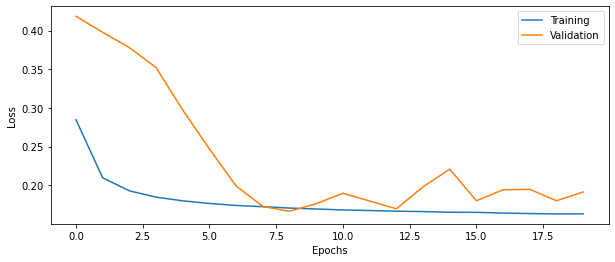

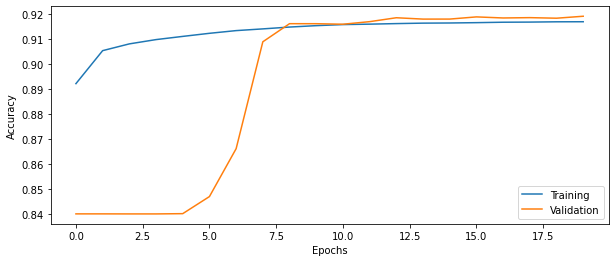

In [94]:
plot_results(history6)

# Part 16: Activation function

Try changing the activation function in each layer from sigmoid to ReLU, write down the test accuracy.

Note: the last layer should still have a sigmoid activation function.

https://keras.io/api/layers/activations/

### 2 layers, 20 nodes, class weights, ReLU, no batch normalization

In [95]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape

# Build and train model
model7 = build_DNN(input_shape=input_shape,
                   number_layers=2,
                   number_nodes=20,
                   act_fun='relu',
                   learning_rate=0.1,
                   use_bn=False)


history7 = model7.fit(Xtrain,
                      Ytrain,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(Xval,Yval),
                      class_weight=class_weights) 
model7.summary()

Epoch 1/20
54/54 [==============================] - 3s 41ms/step - loss: 0.3759 - accuracy: 0.8087 - val_loss: 0.2489 - val_accuracy: 0.8974
Epoch 2/20
54/54 [==============================] - 2s 28ms/step - loss: 0.2019 - accuracy: 0.8977 - val_loss: 0.2677 - val_accuracy: 0.8988
Epoch 3/20
54/54 [==============================] - 1s 27ms/step - loss: 0.1922 - accuracy: 0.9020 - val_loss: 0.2218 - val_accuracy: 0.9074
Epoch 4/20
54/54 [==============================] - 2s 33ms/step - loss: 0.1876 - accuracy: 0.9045 - val_loss: 0.2055 - val_accuracy: 0.9093
Epoch 5/20
54/54 [==============================] - 2s 32ms/step - loss: 0.1860 - accuracy: 0.9055 - val_loss: 0.2589 - val_accuracy: 0.9060
Epoch 6/20
54/54 [==============================] - 3s 65ms/step - loss: 0.1823 - accuracy: 0.9068 - val_loss: 0.2134 - val_accuracy: 0.9097
Epoch 7/20
54/54 [==============================] - 3s 47ms/step - loss: 0.1807 - accuracy: 0.9074 - val_loss: 0.2526 - val_accuracy: 0.9079
Epoch 8/20
54

In [96]:
# Evaluate model on test data
score = model7.evaluate(Xtest,Ytest,batch_size=10000)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

12/12 [==============================] - 0s 2ms/step - loss: 0.2576 - accuracy: 0.9093
Test loss: 0.2576
Test accuracy: 0.9093


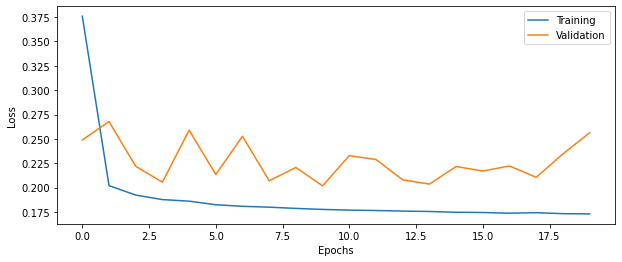

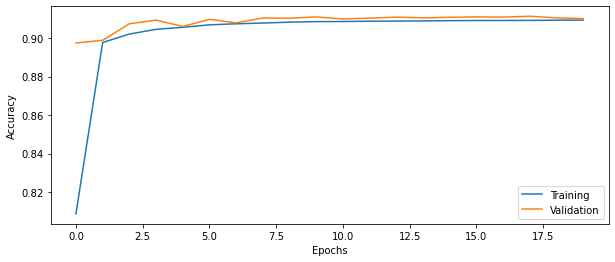

In [97]:
plot_results(history7)

# Part 17: Optimizer

Try changing the optimizer from SGD to Adam (with learning rate 0.1 as before). Remember to import the Adam optimizer from keras.optimizers. 

https://keras.io/optimizers/


### 2 layers, 20 nodes, class weights, Adam optimizer, no batch normalization, sigmoid activations

In [98]:

from tensorflow.keras.optimizers import Adam
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape

# Build and train model
model8 = build_DNN(input_shape=input_shape,
                   number_layers=2,
                   number_nodes=20,
                   act_fun='sigmoid',
                   optimizer='adam',
                   learning_rate=0.1,
                   use_bn=False)


history8 = model8.fit(Xtrain,
                      Ytrain,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(Xval,Yval),
                      class_weight=class_weights) 
model8.summary()

Epoch 1/20
54/54 [==============================] - 2s 26ms/step - loss: 0.3502 - accuracy: 0.8210 - val_loss: 0.2516 - val_accuracy: 0.9083
Epoch 2/20
54/54 [==============================] - 2s 42ms/step - loss: 0.1897 - accuracy: 0.9030 - val_loss: 0.2258 - val_accuracy: 0.9099
Epoch 3/20
54/54 [==============================] - 4s 77ms/step - loss: 0.1962 - accuracy: 0.8986 - val_loss: 0.2235 - val_accuracy: 0.9106
Epoch 4/20
54/54 [==============================] - 3s 48ms/step - loss: 0.1802 - accuracy: 0.9083 - val_loss: 0.2268 - val_accuracy: 0.9114
Epoch 5/20
54/54 [==============================] - 3s 49ms/step - loss: 0.1828 - accuracy: 0.9068 - val_loss: 0.2262 - val_accuracy: 0.9092
Epoch 6/20
54/54 [==============================] - 3s 48ms/step - loss: 0.1797 - accuracy: 0.9086 - val_loss: 0.2237 - val_accuracy: 0.9112
Epoch 7/20
54/54 [==============================] - 3s 47ms/step - loss: 0.1800 - accuracy: 0.9096 - val_loss: 0.2208 - val_accuracy: 0.9113
Epoch 8/20
54

In [99]:
# Evaluate model on test data
score = model8.evaluate(Xtest,Ytest,batch_size=10000)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

12/12 [==============================] - 0s 3ms/step - loss: 0.2067 - accuracy: 0.9125
Test loss: 0.2067
Test accuracy: 0.9125


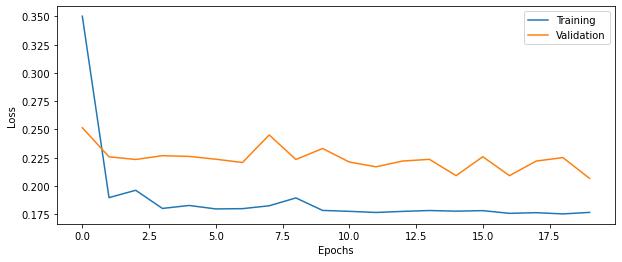

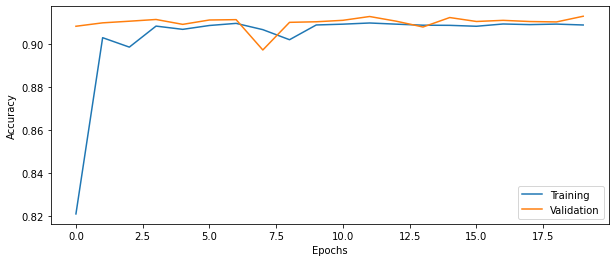

In [100]:
plot_results(history8)

# Part 18: Dropout regularization

Dropout is a type of regularization that can improve accuracy for validation and test data. 

Add a Dropout layer after each Dense layer (but not after the final dense layer) in `build_DNN`, with a dropout probability of 50%. Remember to first import the Dropout layer from keras.layers

See https://keras.io/api/layers/regularization_layers/dropout/ for how the Dropout layer works.

---

Question 15: How does the validation accuracy change when adding dropout?

Question 16: How does the test accuracy change when adding dropout?

In [ ]:
# Validation accuracy is reduced hence the model(i.emodel.9) is not being able to fit properly, because high dropout increase the variance in some layers
# Test accuracy is reduced because more uncertainty has been introduced in to the network

### 2 layers, 20 nodes, class weights, dropout, SGD optimizer, no batch normalization, sigmoid activations

In [101]:
from keras.layers import Dropout
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape

# Build and train model
model9 = build_DNN(input_shape=input_shape,
                   number_layers=2,
                   number_nodes=20,
                   act_fun='sigmoid',
                   optimizer='sgd',
                   learning_rate=0.1,
                   use_bn=False,
                   use_dropout=True)

history9 = model9.fit(Xtrain,
                      Ytrain,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(Xval,Yval),
                      class_weight=class_weights) 
model9.summary()

Epoch 1/20
54/54 [==============================] - 2s 32ms/step - loss: 0.7289 - accuracy: 0.5339 - val_loss: 0.6481 - val_accuracy: 0.8922
Epoch 2/20
54/54 [==============================] - ETA: 0s - loss: 0.6610 - accuracy: 0.60 - 2s 36ms/step - loss: 0.6594 - accuracy: 0.6048 - val_loss: 0.5896 - val_accuracy: 0.8828
Epoch 3/20
54/54 [==============================] - 2s 29ms/step - loss: 0.5941 - accuracy: 0.6853 - val_loss: 0.4992 - val_accuracy: 0.8826
Epoch 4/20
54/54 [==============================] - 2s 33ms/step - loss: 0.5208 - accuracy: 0.7545 - val_loss: 0.4089 - val_accuracy: 0.8838
Epoch 5/20
54/54 [==============================] - 2s 31ms/step - loss: 0.4554 - accuracy: 0.7983 - val_loss: 0.3431 - val_accuracy: 0.8856
Epoch 6/20
54/54 [==============================] - 2s 32ms/step - loss: 0.4074 - accuracy: 0.8249 - val_loss: 0.3053 - val_accuracy: 0.8878
Epoch 7/20
54/54 [==============================] - 3s 57ms/step - loss: 0.3742 - accuracy: 0.8415 - val_loss: 0

In [102]:
# Evaluate model on test data
score = model9.evaluate(Xtest,Ytest,batch_size=10000)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

12/12 [==============================] - 0s 6ms/step - loss: 0.2533 - accuracy: 0.8981
Test loss: 0.2533
Test accuracy: 0.8981


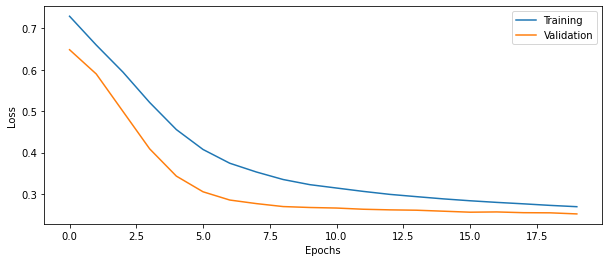

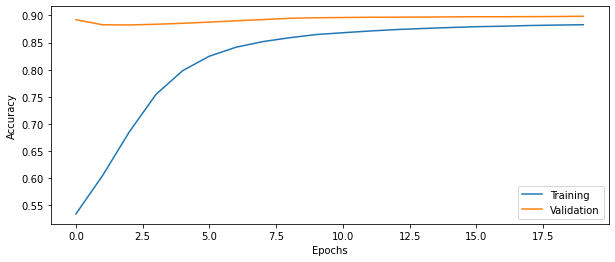

In [103]:
plot_results(history9)

# Part 19: Improving performance

Spend some time (30 - 90 minutes) playing with the network architecture (number of layers, number of nodes per layer, activation function) and other hyper parameters (optimizer, learning rate, batch size, number of epochs, degree of regularization). For example, try a much deeper network. How much does the training time increase for a network with 10 layers?

Question 17: How high classification accuracy can you achieve for the test data? What is your best configuration?

In [ ]:
Best parameters observed are optimizer=adam, use_dropout = False,use batch normalization = True, activation_function = relu 

In [104]:
# Find your best configuration for the DNN

# Build and train DNN
model10 = build_DNN(input_shape=input_shape,
                   number_layers=5,
                   number_nodes=60,
                   act_fun='relu',
                   optimizer='adam',
                   learning_rate=0.1,
                   use_bn=True,
                   use_dropout=False)

history10 = model10.fit(Xtrain,
                      Ytrain,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(Xval,Yval),
                      class_weight=class_weights)  


Epoch 1/20
54/54 [==============================] - 5s 65ms/step - loss: 0.2371 - accuracy: 0.8858 - val_loss: 2.2838 - val_accuracy: 0.8676
Epoch 2/20
54/54 [==============================] - 2s 30ms/step - loss: 0.1768 - accuracy: 0.9109 - val_loss: 0.6623 - val_accuracy: 0.9022
Epoch 3/20
54/54 [==============================] - 5s 96ms/step - loss: 0.1716 - accuracy: 0.9130 - val_loss: 0.2554 - val_accuracy: 0.9113
Epoch 4/20
54/54 [==============================] - 3s 61ms/step - loss: 0.1636 - accuracy: 0.9166 - val_loss: 0.1582 - val_accuracy: 0.9168
Epoch 5/20
54/54 [==============================] - 3s 60ms/step - loss: 0.1629 - accuracy: 0.9170 - val_loss: 0.2357 - val_accuracy: 0.9189
Epoch 6/20
54/54 [==============================] - 3s 60ms/step - loss: 0.1608 - accuracy: 0.9172 - val_loss: 0.3316 - val_accuracy: 0.9173
Epoch 7/20
54/54 [==============================] - 3s 54ms/step - loss: 0.1593 - accuracy: 0.9180 - val_loss: 0.1966 - val_accuracy: 0.9202
Epoch 8/20
54

In [105]:
# Evaluate DNN on test data
score = model10.evaluate(Xtest,Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 9s 3ms/step - loss: 0.3944 - accuracy: 0.9117
Test loss: 0.3944
Test accuracy: 0.9117


# Part 20: Dropout uncertainty

Dropout can also be used during testing, to obtain an estimate of the model uncertainty. Since dropout will randomly remove connections, the network will produce different results every time the same (test) data is put into the network. This technique is called Monte Carlo dropout. For more information, see this paper http://proceedings.mlr.press/v48/gal16.pdf

To achieve this, we need to redefine the Keras Dropout call by running the cell below, and use 'myDropout' in each call to Dropout, in the cell that defines the DNN. The `build_DNN` function takes two boolean arguments, use_dropout and use_custom_dropout, add a standard Dropout layer if use_dropout is true, add a myDropout layer if use_custom_dropout is true.

Run the same test data through the trained network 100 times, with dropout turned on. 

Question 18: What is the mean and the standard deviation of the test accuracy?

In [ ]:
# The mean is 92.8% and standard deviation is approximated to  zero

In [107]:
import keras.backend as K
import keras

class myDropout(keras.layers.Dropout):
    """Applies Dropout to the input.
    Dropout consists in randomly setting
    a fraction `rate` of input units to 0 at each update during training time,
    which helps prevent overfitting.
    # Arguments
        rate: float between 0 and 1. Fraction of the input units to drop.
        noise_shape: 1D integer tensor representing the shape of the
            binary dropout mask that will be multiplied with the input.
            For instance, if your inputs have shape
            `(batch_size, timesteps, features)` and
            you want the dropout mask to be the same for all timesteps,
            you can use `noise_shape=(batch_size, 1, features)`.
        seed: A Python integer to use as random seed.
    # References
        - [Dropout: A Simple Way to Prevent Neural Networks from Overfitting](
           http://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)
    """
    def __init__(self, rate, training=True, noise_shape=None, seed=None, **kwargs):
        super(myDropout, self).__init__(rate, noise_shape=None, seed=None,**kwargs)
        self.training = training

        
    def call(self, inputs, training=None):
        if 0. < self.rate < 1.:
            noise_shape = self._get_noise_shape(inputs)

            def dropped_inputs():
                return K.dropout(inputs, self.rate, noise_shape,
                                 seed=self.seed)
            if not training: 
                return K.in_train_phase(dropped_inputs, inputs, training=self.training)
            return K.in_train_phase(dropped_inputs, inputs, training=training)
        return inputs

### Your best config, custom dropout

In [108]:
# Your best training parameters


# Build and train model
model11 = build_DNN(input_shape=input_shape,
                   number_layers=5,
                   number_nodes=60,
                   act_fun='relu',
                   optimizer='adam',
                   learning_rate=0.1,
                   use_bn=True,
                   use_dropout=False,
                   use_custom_dropout=True) 

history11 = model11.fit(Xtrain,
                      Ytrain,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(Xval,Yval))  


Epoch 1/20
54/54 [==============================] - 3s 45ms/step - loss: 0.2321 - accuracy: 0.8811 - val_loss: 1.4643 - val_accuracy: 0.8778
Epoch 2/20
54/54 [==============================] - 8s 157ms/step - loss: 0.1704 - accuracy: 0.9041 - val_loss: 0.3732 - val_accuracy: 0.9014
Epoch 3/20
54/54 [==============================] - 4s 74ms/step - loss: 0.1649 - accuracy: 0.9074 - val_loss: 0.1808 - val_accuracy: 0.8817
Epoch 4/20
54/54 [==============================] - 4s 72ms/step - loss: 0.1601 - accuracy: 0.9108 - val_loss: 0.2488 - val_accuracy: 0.9043
Epoch 5/20
54/54 [==============================] - 4s 72ms/step - loss: 0.1555 - accuracy: 0.9136 - val_loss: 0.1907 - val_accuracy: 0.8846
Epoch 6/20
54/54 [==============================] - 4s 65ms/step - loss: 0.1526 - accuracy: 0.9154 - val_loss: 0.2062 - val_accuracy: 0.8747
Epoch 7/20
54/54 [==============================] - 3s 62ms/step - loss: 0.1488 - accuracy: 0.9177 - val_loss: 0.2043 - val_accuracy: 0.8775
Epoch 8/20
5

In [109]:
# Run this cell a few times to evalute the model on test data, 
# if you get slightly different test accuracy every time, Dropout during testing is working

# Evaluate model on test data
score = model11.evaluate(Xtest,Ytest)                      
print('Test accuracy: %.4f' % score[1])


3582/3582 [==============================] - 6s 2ms/step - loss: 0.1481 - accuracy: 0.9238
Test accuracy: 0.9238


In [83]:
# Run the testing 100 times, and save the accuracies in an array
accuracy=[]
for i in range(1,101):
    score= model11.evaluate(Xtest,Ytest,batch_size=10000)
    accuracy.append(score[1])
    
# Calculate and print mean and std of accuracies
mean_accuracy=np.mean(accuracy,axis=0)
print("mean of test accuracies : ",mean_accuracy)
sd_accuracy=np.std(accuracy,axis=0)
print("std of test accuracies : ",sd_accuracy)


12/12 [==============================] - 0s 15ms/step - loss: 0.2329 - accuracy: 0.9282
mean of test accuracies :  0.9282721322774887
std of test accuracies :  9.920481306323685e-05


# Part 21: Cross validation uncertainty

Cross validation (CV) is often used to evaluate a model, by training and testing using different subsets of the data it is possible to get the uncertainty as the standard deviation over folds. We here use a help function from scikit-learn to setup the CV, see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html . Use 10 folds with shuffling, random state 1234. 

Note: We here assume that you have found the best hyper parameters, so here the data are only split into training and testing, no validation.

---

Question 19: What is the mean and the standard deviation of the test accuracy?

Question 20: What is the main advantage of dropout compared to CV for estimating test uncertainty? The difference may not be so large in this notebook, but imagine that you have a network that takes 24 hours to train.

In [ ]:
#19. The mean of the test is 91.7% and standard deviation is zero
#20. Dropout makes use of the whole data, while CV will parts of the data that may not be present in the original data

In [110]:
from sklearn.model_selection import StratifiedKFold
import random
batch_size = 10000
epochs = 20

accuracy= np.array(np.arange(0,10), np.float32)
i=0
# random.seed(1234)
# Define 10-fold cross validation
skf = StratifiedKFold(n_splits=10)
# Loop over cross validation folds
for train_index, test_index in skf.split(Xtrain, Ytrain):

    # Calculate class weights for current split
    X_train, X_test = Xtrain[train_index], Xtrain[test_index]
    y_train, y_test = Ytrain[train_index], Ytrain[test_index]
    class_weights = class_weight.compute_class_weight(class_weight = 'balanced', classes = np.unique(y_train), y = y_train)
    class_weights = {0: class_weights[0], 1: class_weights[1]}
    input_shape = X_train.shape
    # Rebuild the DNN model, to not continue training on the previously trained model
    model12 = build_DNN(input_shape = input_shape, number_layers = 2, number_nodes=20,use_custom_dropout=True)
    # Fit the model with training set and class weights for this fold
    model12.fit(x=X_train,
                y=y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=1,
                validation_data=(X_test,y_test),
                class_weight=class_weights)
    # Evaluate the model using the test set for this fold
    score = model11.evaluate(Xtest, Ytest, verbose=0)
    # Save the test accuracy in an array
    accuracy[i] = score[1]
    i=i+1
# Calculate and print mean and std of accuracies
mean_v = np.mean(accuracy)
std_v = np.std(accuracy)

print('The mean of cross validation is %.4f'% mean_v)
print('The standard deviation of cross validation is %.4f'% std_v)


Epoch 1/20
49/49 [==============================] - 2s 39ms/step - loss: 0.6273 - accuracy: 0.7024 - val_loss: 0.5745 - val_accuracy: 0.7952
Epoch 2/20
49/49 [==============================] - 2s 43ms/step - loss: 0.4903 - accuracy: 0.8431 - val_loss: 0.4358 - val_accuracy: 0.8667
Epoch 3/20
49/49 [==============================] - 2s 34ms/step - loss: 0.3647 - accuracy: 0.8757 - val_loss: 0.3483 - val_accuracy: 0.8786
Epoch 4/20
49/49 [==============================] - 2s 32ms/step - loss: 0.2939 - accuracy: 0.8825 - val_loss: 0.3180 - val_accuracy: 0.8818
Epoch 5/20
49/49 [==============================] - 1s 29ms/step - loss: 0.2602 - accuracy: 0.8862 - val_loss: 0.2992 - val_accuracy: 0.8854
Epoch 6/20
49/49 [==============================] - 4s 72ms/step - loss: 0.2443 - accuracy: 0.8891 - val_loss: 0.2893 - val_accuracy: 0.8886
Epoch 7/20
49/49 [==============================] - 3s 52ms/step - loss: 0.2340 - accuracy: 0.8919 - val_loss: 0.2810 - val_accuracy: 0.8911
Epoch 8/20
49

Epoch 19/20
49/49 [==============================] - 1s 28ms/step - loss: 0.2079 - accuracy: 0.8994 - val_loss: 0.2583 - val_accuracy: 0.8981
Epoch 20/20
49/49 [==============================] - 2s 31ms/step - loss: 0.2067 - accuracy: 0.8999 - val_loss: 0.2598 - val_accuracy: 0.8981
Epoch 1/20
49/49 [==============================] - 3s 46ms/step - loss: 0.6846 - accuracy: 0.6586 - val_loss: 0.6556 - val_accuracy: 0.6850
Epoch 2/20
49/49 [==============================] - 2s 35ms/step - loss: 0.6373 - accuracy: 0.7456 - val_loss: 0.6006 - val_accuracy: 0.7904
Epoch 3/20
49/49 [==============================] - 1s 26ms/step - loss: 0.5675 - accuracy: 0.8250 - val_loss: 0.5138 - val_accuracy: 0.8506
Epoch 4/20
49/49 [==============================] - 2s 31ms/step - loss: 0.4695 - accuracy: 0.8613 - val_loss: 0.4224 - val_accuracy: 0.8724
Epoch 5/20
49/49 [==============================] - 2s 31ms/step - loss: 0.3766 - accuracy: 0.8752 - val_loss: 0.3563 - val_accuracy: 0.8801
Epoch 6/20


Epoch 17/20
49/49 [==============================] - 2s 48ms/step - loss: 0.2051 - accuracy: 0.9001 - val_loss: 0.2527 - val_accuracy: 0.9005
Epoch 18/20
49/49 [==============================] - 2s 48ms/step - loss: 0.2037 - accuracy: 0.9009 - val_loss: 0.2498 - val_accuracy: 0.9012
Epoch 19/20
49/49 [==============================] - 2s 49ms/step - loss: 0.2022 - accuracy: 0.9013 - val_loss: 0.2508 - val_accuracy: 0.9012
Epoch 20/20
49/49 [==============================] - 2s 49ms/step - loss: 0.2018 - accuracy: 0.9020 - val_loss: 0.2500 - val_accuracy: 0.9027
Epoch 1/20
49/49 [==============================] - 3s 55ms/step - loss: 0.6798 - accuracy: 0.5357 - val_loss: 0.6443 - val_accuracy: 0.6843
Epoch 2/20
49/49 [==============================] - 2s 47ms/step - loss: 0.6055 - accuracy: 0.7543 - val_loss: 0.5564 - val_accuracy: 0.8138
Epoch 3/20
49/49 [==============================] - 2s 48ms/step - loss: 0.4958 - accuracy: 0.8438 - val_loss: 0.4356 - val_accuracy: 0.8688
Epoch 4/2

In [ ]:
# Part 22: DNN regression

A similar DNN can be used for regression, instead of classification.

Question 21: How would you change the DNN in order to use it for regression instead?
            

In [ ]:
 # DNN for regression can be implemented by using no activation function at the output layer

## Report

Send in this jupyter notebook, with answers to all questions.